In [1]:
from jBook_tools import *
plt.rcParams['figure.figsize'] = [15, 5] #Plotgröße anpassen

from myst_nb import glue
from scipy.fft import fft, fftfreq,rfft, rfftfreq
from scipy.interpolate import interp1d
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def generate_wave(freq, sample_rate, duration,**kwargs):
    try:
        phaseshift = kwargs['phaseshift']
    except:
        phaseshift = 0   
    try:
        amplitude = kwargs['amplitude']
    except:
        amplitude = 1           
    
    x = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    if 'form' in kwargs:
        if kwargs['form'] == 'cos':
            y = amplitude*np.cos((2 * np.pi) * x*freq + phaseshift)
        elif kwargs['form'] == 'sin':
            y = amplitude*np.sin((2 * np.pi) * x*freq + phaseshift)
        else:
            print('WARNING: unsopported waveform. Using sinus.')
            y = amplitude*np.sin((2 * np.pi) * x*freq + phaseshift)
    else:
        y = amplitude*np.sin((2 * np.pi) * x*freq + phaseshift)               
    return x, y

def generate_AM_wave(freq_c, amp_c, freq_m, amp_m, sample_rate, duration):
    x = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    y = (amp_c+amp_m*np.cos(2*np.pi*x*freq_m))*np.cos(2*np.pi*x*freq_c)
    return x, y

def generate_AM_wave2(time,freq_c,amp_c,modulator):
    x = time
    y = (amp_c+modulator)*np.cos(2*np.pi*x*freq_c)
    return x, y



def plot_vs_time(time,**kwargs):
    if 'show_time' in kwargs:
        idx1 = find_nearest_idx(time, kwargs['show_time'])
        #print(idx1)
        del kwargs['show_time']
    legend = []
    for key, value in kwargs.items():
        #print("{0} = {1}".format(key, value))
        if 'idx1' in locals():
            plt.plot(time[0:idx1],value[0:idx1])
        else:        
            plt.plot(time,value)
        
        legend.append(key)
    plt.grid()
    #plt.text(time[0],value[-1],'$m = ' + str(max()))
    plt.legend(legend)
    plt.xlabel('Time in s')
    plt.ylabel('Amplitude')
    plt.show()
        
def plot_fft(time,**kwargs):
    if 'xlim' in kwargs:
        plt.xlim(kwargs['xlim'])
        del kwargs['xlim']
    if 'ytype' in kwargs:
        ytype = kwargs['ytype']
        del kwargs['ytype']
    if 'yscale' in kwargs:
        yscale = kwargs['yscale']
        del kwargs['yscale']
    else:
        yscale = 'log'
        
    N = len(time)
     #sample_rate = 1/ time[1]-time[0]
    xf = fftfreq(N, (time[1]-time[0]))
    legend = []
    for key, value in kwargs.items():
        yf = fft(value)
        plt.plot(xf, np.abs(yf))
        legend.append(key)

    plt.legend(legend)
    plt.grid()
    plt.xlabel('Frequency in rad/s')
    plt.ylabel('Power')
    plt.show()
    
def plot_rfft_amp(time,**kwargs):
    if 'xlim' in kwargs:
        plt.xlim(kwargs['xlim'])
        del kwargs['xlim']
    if 'ylim' in kwargs:
        plt.ylim(kwargs['ylim'])
        del kwargs['ylim']
    if 'ytype' in kwargs:
        ytype = kwargs['ytype']
        del kwargs['ytype']
    if 'yscale' in kwargs:
        yscale = kwargs['yscale']
        del kwargs['yscale']
    else:
        yscale = 'log'
            
    
    N = len(time)
     #sample_rate = 1/ time[1]-time[0]
    xf = rfftfreq(N, (time[1]-time[0]))
    legend = []
    for key, value in kwargs.items():
        yf = rfft(value)
        if 'ytype' in locals():
            if ytype == 'pow':
                yf =  np.round((np.abs(yf)**2)/N,4)
                plt.ylabel('Power')
            elif ytype == 'rms':
                yf =  np.round(np.sqrt(2)*np.abs(yf)/N,4)
                plt.ylabel('rms')
            elif ytype == 'amp':
                yf = np.round(2*np.abs(yf)/N,4)
                plt.ylabel('Amplitude')
            else:
                print('WARNING: unknown ytype. Using default amplitude.')
                yf_amp = np.round(2*np.abs(yf)/N,4)
                plt.ylabel('Amplitude')
                
        else:
              yf = np.round(2*np.abs(yf)/N,4)
              plt.ylabel('Amplitude')
        plt.plot(xf, yf)
        legend.append(key)
            
    plt.legend(legend)
    plt.grid()
    plt.xlabel('Frequency in rad/s')
    
    plt.yscale(yscale)
    plt.show()
    
def generate_wavelet(fmin,fmax,amp,sample_rate, duration):
    x = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)

    freq = np.linspace(fmin, fmax, int(duration * sample_rate), endpoint=False)
    
    dx = x[1]-x[0]

    x_plot = (freq * dx ).cumsum()    # Cumsum freq * change in x

    y = amp*np.sin(2 * np.pi * x_plot)
    #plt.plot(x, y, label="sin(freq(x) * x)")
    #plt.plot(x, freq, label="freq(x)")
    #plt.legend()
    #plt.show()
    return x,y

def plt_mod_trap(signal_m,signal_AM):
    plt.plot(signal_m,signal_AM)
    plt.grid()
    plt.xlabel('Modulationssignal $u(t)_m$')
    plt.ylabel('Modulated Signal $u(t)_{AM}$')
    plt.show()

In [53]:
ut = symbols('u(t)')
sym_legend = assign_meta_data(sym_legend,ut,'Spannung in abhängigkeit der Zeit')

utc = symbols('u_{c}(t)')
sym_legend = assign_meta_data(sym_legend,utc,'Spannungsverlauf des Trägers')

utm = symbols('u_{m}(t)')
sym_legend = assign_meta_data(sym_legend,utm,'Spannungsverlauf des Modulationssignal')

utmt = Function('u_m')
func_legend = assign_meta_data(func_legend,utmt,'Spannungsverlauf des Modulationssignals in Abhängigkeit der Zeit')

utAM = symbols('u_{AM}(t)')
sym_legend = assign_meta_data(sym_legend,utAM,'AM Moduliertes Signal')

utFM = symbols('u_{FM}(t)')
sym_legend = assign_meta_data(sym_legend,utFM,'FM Moduliertes Signal')

utFMt = Function('u_FM')
sym_legend = assign_meta_data(sym_legend,utFMt,'FM Moduliertes Signal')

utPM = symbols('u_{PM}(t)')
sym_legend = assign_meta_data(sym_legend,utPM,'PM Moduliertes Signal')

utFMPM = symbols('u_{FM,PM}(t)')
sym_legend = assign_meta_data(sym_legend,utFMPM,'FM und PM Moduliertes Signal')

utFMPMt = Function('u_{FM,PM}')
func_legend = assign_meta_data(func_legend,utFMPMt,'FM und PM Moduliertes Signal in Abhängigkeit der Zeit')

U = symbols('\\hat{U}')
sym_legend = assign_meta_data(sym_legend,U,'Amplitude der Spannung')

Uc = symbols('\\hat{U}_c')
sym_legend = assign_meta_data(sym_legend,Uc,'Amplitude des Trägersignals (Carrier)')

Um = symbols('\\hat{U}_m')
sym_legend = assign_meta_data(sym_legend,Um,'Amplitude des Modulationssignals')

UAM = symbols('\\hat{U}_{AM}')
sym_legend = assign_meta_data(sym_legend,UAM,'Amplitude des AM modulierten Signals')

UFM = symbols('\\hat{U}_{FM}')
sym_legend = assign_meta_data(sym_legend,UAM,'Amplitude des FM modulierten Signals')

UPM = symbols('\\hat{U}_{PM}')
sym_legend = assign_meta_data(sym_legend,UAM,'Amplitude des PM modulierten Signals')

UFMPM = symbols('\\hat{U}_{FM,PM}')
sym_legend = assign_meta_data(sym_legend,UAM,'Amplitude des FM und PM modulierten Signals')

Urms = symbols('U_{rms}')
sym_legend = assign_meta_data(sym_legend,Urms,'Effektivwert der Spannung')

Ucrms = symbols('U_{c,rms}')
sym_legend = assign_meta_data(sym_legend,Ucrms,'Effektivwert des Trägersignals (Carrier)')

Umrms = symbols('U_{m,rms}')
sym_legend = assign_meta_data(sym_legend,Umrms,'Effektivwert des Modulationssignals')

UAMrms = symbols('U_{AM,rms}')
sym_legend = assign_meta_data(sym_legend,UAMrms,'Effektivwert des AM moduliertes Signals')

w = symbols('omega',positive=True)
sym_legend = assign_meta_data(sym_legend,w,'Kreisfrequenz des Trägersignals (Carrier)')

wt = Function('omega',positive=True)
func_legend = assign_meta_data(func_legend,w,'Kreisfrequenz des Trägersignals (Carrier) in Abhängigkeit der Zeit')

wc = symbols('omega_c',positive=True)
sym_legend = assign_meta_data(sym_legend,w,'Kreisfrequenz')

wm = symbols('omega_m',positive=True)
sym_legend = assign_meta_data(sym_legend,w,'Kreisfrequenz')

f = symbols('f',positive=True)
sym_legend = assign_meta_data(sym_legend,f,'Frequenz')

deltaf = Symbol("\Delta f",positive=True)
sym_legend = assign_meta_data(sym_legend,deltaf,'Frequenzhub, maximale Abweichung von der Trägerfrequenz')

ft = Function('f',positive=True)
func_legend = assign_meta_data(func_legend,ft,'Frequenz in Abhängigkeit der Zeit')

fc = symbols('f_c',positive=True)
sym_legend = assign_meta_data(sym_legend,fc,'Frequenz des Trägersignals (Carrier)')

dfc = Symbol("\Delta f_c")
sym_legend = assign_meta_data(sym_legend,dfc,'Frequenzhub, maximale Abweichung von der Trägerfrequenz')

fm = symbols('f_m',positive=True)
sym_legend = assign_meta_data(sym_legend,fm,'Frequenz des Modulationssignals')

fmt = Function('f_m',positive=True)
func_legend = assign_meta_data(func_legend,fm,'Frequenz des Modulationssignals')

fmmax = symbols('f_m_max',positive=True)
sym_legend = assign_meta_data(sym_legend,w,'maximale Frequenz des Modulationssignals')

t = symbols('t')
sym_legend = assign_meta_data(sym_legend,t,'Zeit')

tau = symbols('tau')
sym_legend = assign_meta_data(sym_legend,tau,'Zeit')

phi = symbols('\\varphi')
sym_legend = assign_meta_data(sym_legend,phi,'Phasenlage')

phit = Function('\\varphi')
func_legend = assign_meta_data(func_legend,phi,'Phasenlage in Abhängigkeit der Zeit')

m = symbols('m')
sym_legend = assign_meta_data(sym_legend,m,'Modulationsgrad')

BAM = symbols('B_AM')
sym_legend = assign_meta_data(sym_legend,BAM,'Mindestbandbreite')

P = symbols('P')
sym_legend = assign_meta_data(sym_legend,P,'Leistung')

PAM = symbols('P_AM')
sym_legend = assign_meta_data(sym_legend,PAM,'Leistung des AM moduliertes Signals ')

Pc = symbols('P_c')
sym_legend = assign_meta_data(sym_legend,Pc,'Leistung des Trägersignals (Carrier)')

Pm = symbols('P_m')
sym_legend = assign_meta_data(sym_legend,Pm,'Leistung des Modulationssignals')

PUSB = symbols('P_USB')
sym_legend = assign_meta_data(sym_legend,PUSB,'Leistung des oberen Seitenbandes')

PLSB = symbols('P_LSB')
sym_legend = assign_meta_data(sym_legend,PLSB,'Leistung des unteren Seitenbandes')

R = symbols('R')
sym_legend = assign_meta_data(sym_legend,R,'Widerstand')

B10 = symbols('B_{10\%}')
sym_legend = assign_meta_data(sym_legend,B10,'Bandbreite des frequenzmodulierten Signales')

B1 = symbols('B_{1\%}')
sym_legend = assign_meta_data(sym_legend,B1,'Bandbreite des frequenzmodulierten Signales')

eta = symbols('eta')
sym_legend = assign_meta_data(sym_legend,eta,'Modulationsindex')

fbit = symbols('f_{Bit}')
sym_legend = assign_meta_data(sym_legend,fbit,'Bittaktfrequenz')

Tbit = symbols('T_{Bit}')
sym_legend = assign_meta_data(sym_legend,Tbit,'Bitdauer')

#add to glue
for key in sym_legend:
    try:
        glue(key.name, key, display=False)
    except:
        pass


# Modulation

## Legende

In [3]:
for key in sym_legend:
    display(Latex(' ' + latex(key) + '  ...  \\textrm{' + sym_legend[key] + '}' ) )

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Frequenzspektrum
Jedes Periodische Signal kann im Frequenzspektrum dargestellt werden. {cite}`NIAN041`

In [4]:
FREQUENCY = 400
SAMPLE_RATE = 44100
DURATION = 5
PHASE=-45/180*2*np.pi

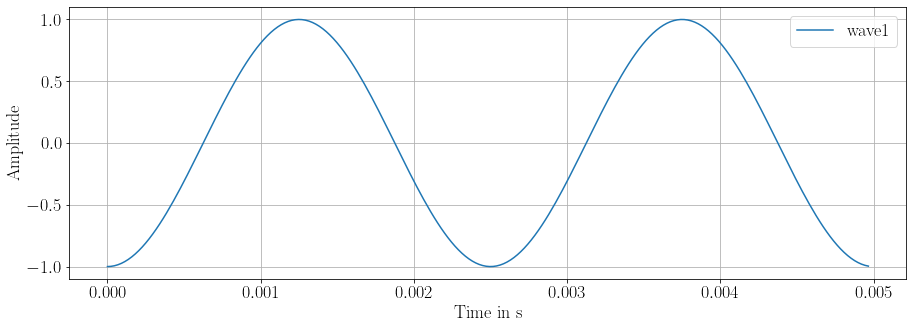

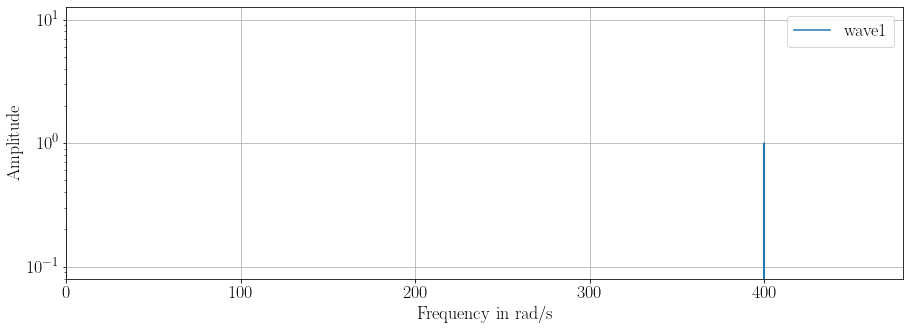

In [5]:
time, signal1 = generate_wave(FREQUENCY,SAMPLE_RATE,DURATION,phaseshift=PHASE)
plot_vs_time(time,wave1=signal1,show_time=2/FREQUENCY)
plot_rfft_amp(time,wave1=signal1,xlim=[0,1.2*FREQUENCY])

(arten-modulation)=
## Arten von Modulation
Wird ein periodisches Signal betrachtet können primär drei Parameter variert werden.  
Wird die Amplitude verändert spricht man von der Amplitudenmodulation.  
Wird die Frequenz verändert spricht man von der Frequenzmodulation.  
Wird die Phase verändert spricht man von der Phasenmodulation.  

In [6]:
Eq(ut,U*cos(w*t+phi))

u(t) = \hat{U}⋅cos(\varphi + ω⋅t)

## AM Modulation
Die Amplitudenmodulation lässt sich mathematisch wie folgt anschreiben.

In [7]:
utAMeq1=Eq(utAM,(Uc+utm)*cos(wc*t))
display(utAMeq1)
utAMeq2=Eq(utAM,(Uc+Um*cos(wm*t))*cos(wc*t))
#display(utAMeq2)

u_{AM}(t) = (\hat{U}_c + u_{m}(t))⋅cos(ω_c⋅t)

Durch Umformen erhält man eine Gleichung aus der direkt der Modulationsgrad ablesbar ist.

In [8]:
utAMeq2=Eq(utAM,Uc*(1+(Um/Uc)*cos(wm*t+phi))*cos(wc*t))
display(utAMeq2)
meq1=Eq(m,Um/Uc)
display(meq1)

                      ⎛    \hat{U}ₘ⋅cos(\varphi + ωₘ⋅t)⎞           
u_{AM}(t) = \hat{U}_c⋅⎜1 + ────────────────────────────⎟⋅cos(ω_c⋅t)
                      ⎝             \hat{U}_c          ⎠           

     \hat{U}ₘ
m = ─────────
    \hat{U}_c

### Modulationsgrad
Der Modulationsgrad muss kleiner gleich 1 sein. An folgendem Beispiel kann der Einfluss des Modulationsgrade probiert werden.

In [9]:
#Carrier
FREQUENCY_C = 10*10**4
AMPLITUDE_C = 10

#Modulator
FREQUENCY_M = 20*10**3
AMPLITUDE_M = 8

m = 0.8

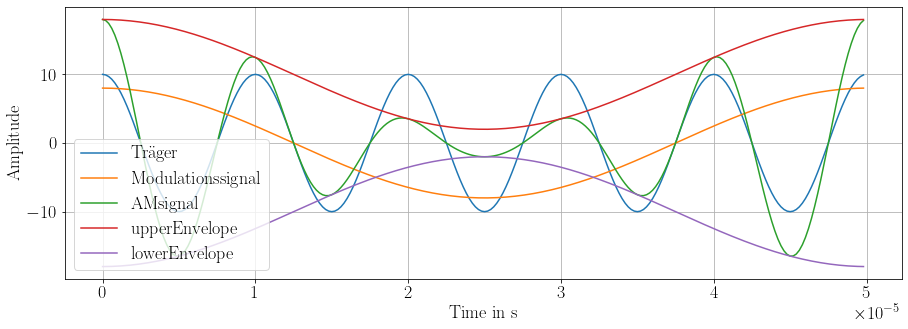

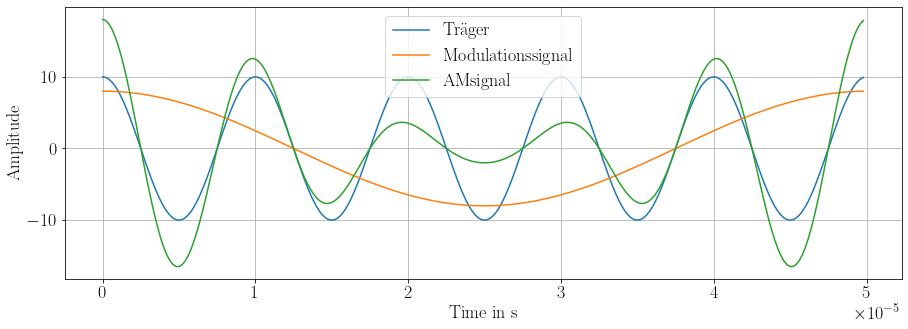

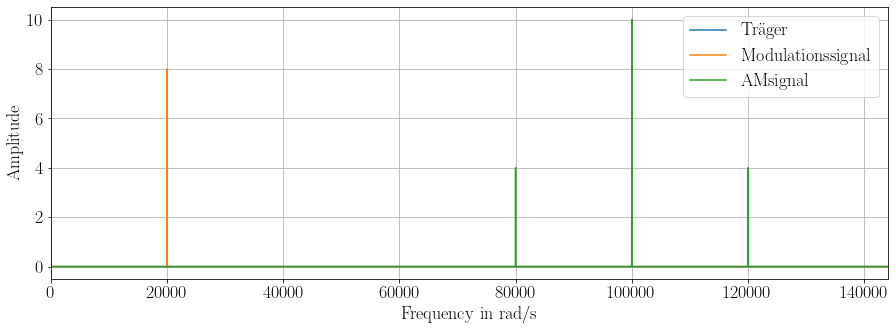

In [10]:
#General Settings
SAMPLE_RATE = 50*FREQUENCY_C
DURATION = 1/FREQUENCY_M*1000

#Generate Signals
time, voltage_c = generate_wave(FREQUENCY_C,SAMPLE_RATE,DURATION,amplitude=AMPLITUDE_C,form='cos')
time, voltage_m = generate_wave(FREQUENCY_M,SAMPLE_RATE,DURATION,amplitude=AMPLITUDE_M,form='cos')

#Show Modulation factor
display(Eq(m,AMPLITUDE_M/AMPLITUDE_C))

#Modulated Signal
_,voltage = generate_AM_wave(FREQUENCY_C, AMPLITUDE_C, FREQUENCY_M, AMPLITUDE_M, SAMPLE_RATE, DURATION)

plot_vs_time(time,Träger=voltage_c,Modulationssignal=voltage_m,AMsignal=voltage,upperEnvelope=voltage_m+10,lowerEnvelope=-(voltage_m+10),show_time=1/FREQUENCY_M)
plot_vs_time(time,Träger=voltage_c,Modulationssignal=voltage_m,AMsignal=voltage,show_time=1/FREQUENCY_M)
plot_rfft_amp(time,Träger=voltage_c,Modulationssignal=voltage_m,AMsignal=voltage,xlim=[0,1.2*(FREQUENCY_C+FREQUENCY_M)],yscale='linear')


Die Trägerfrequenz und die Frequenz des Modulationssignals ist gut zu erkenne. Das resultierende AM modulierte Signal besteht aus drei Frequenzen. Der Trägerfrequenz und die um die Frequenz des Modulationssignals nach Links und Rechts der Trägerfrequenz verschobenen Teile. Diese werden als oberes und unteres Seitenband bezeichnet.

### Bandbreite
Bei der Übertragung wird nicht nur eine Frequenz übertragen sondern ein Frequenzspecktrum. Zum Beipiel Sprache zwischen 20 Hz und 20 kHz. Daraus ergibt sich eine mindestens benötigte Bandbreite. Also ein Mindestabstand zwischen der Frequenz des Trägers und der frequenz des Modulationssignals.

In [11]:
BAMeq1 = Eq(BAM,2*fmmax)
display(BAMeq1)

B_AM = 2⋅fₘ ₘₐₓ

In [12]:
#Carrier
FREQUENCY_C = 1*10**4
AMPLITUDE_C = 10

#Modulator
AMPLITUDE_M = 8
FREQUENCY_M_min = 2000
FREQUENCY_M_max = 3000

#General Settings
SAMPLE_RATE = 100*FREQUENCY_C
DURATION = 100*1/FREQUENCY_M*10**3

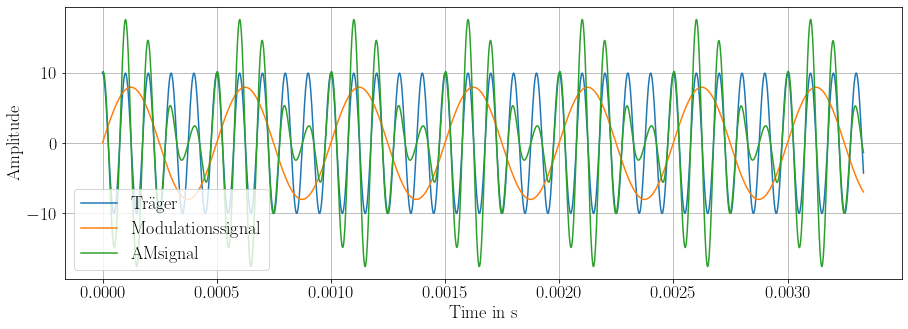

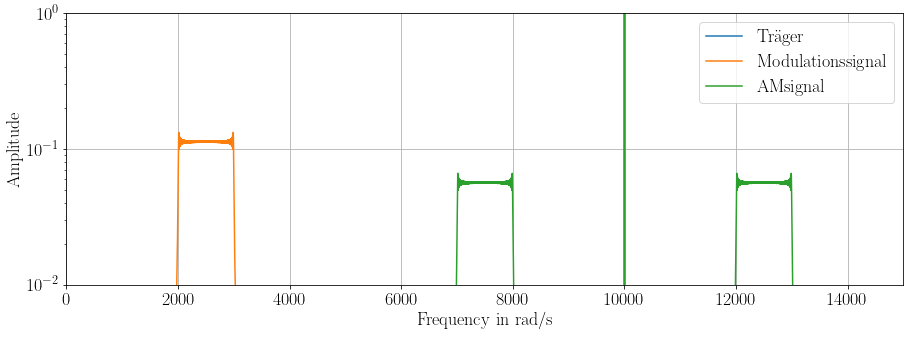

In [13]:
#carrier generation
time, voltage_c = generate_wave(FREQUENCY_C,SAMPLE_RATE,DURATION,amplitude=AMPLITUDE_C,form='cos')

#Random modulator signal
time, voltage_m = generate_wavelet(FREQUENCY_M_min,FREQUENCY_M_max,AMPLITUDE_M,SAMPLE_RATE, DURATION)

#Modulated Signal
_,voltage = generate_AM_wave2(time,FREQUENCY_C,AMPLITUDE_C,voltage_m)

plot_vs_time(time,Träger=voltage_c,Modulationssignal=voltage_m,AMsignal=voltage,show_time=1/300)
plot_rfft_amp(time,Träger=voltage_c,Modulationssignal=voltage_m,AMsignal=voltage,xlim=[0*FREQUENCY_C,1.5*FREQUENCY_C],ylim=[10**-2,None])

### Leistungsbetrachtung
Ein Nachteil der AM Modulation ist die Leistungsaufteilung zwischen Träger und dem Nutzsignal, dem Modulationssignal. Die Gesamtleistung des modulierten Signales ergibt sich aus der Summe der Leistungen des Trägers, des oberen und des unteren Seitenbandes. {cite}`TPAM`

In [14]:
PAMeq1=Eq(PAM,Pc+PUSB+PLSB)
display(PAMeq1)

P_AM = P_LSB + P_USB + P_c

Die Leistung eines reinen Cosinus Signales kann einfach über den Effektivwert berechnet werden.

In [15]:
Peq1=Eq(P,Urms**2/R)
display(Peq1)
Urmseq1=Eq(Urms,1/sqrt(2)*U)
#display(Urmseq1)

           2
    U_{rms} 
P = ────────
       R    

\$ U_{rms} = \frac{U}{\sqrt{2}} \$  
Für die einzelnen Leistungen ergeben sich unter Berücksichtigung des Modulationsfaktors folgende Gleichungen.

In [16]:
display(meq1)
Pceq1=Eq(Pc,(Uc/sqrt(2))**2/R)
display(Pceq1)
PUSBeq1=Eq(PUSB,(Uc*m/(2*sqrt(2)))**2/R)
display(PUSBeq1)
PLSBeq1=Eq(PLSB,(Uc*m/(2*sqrt(2)))**2/R)
display(PLSBeq1)

     \hat{U}ₘ
m = ─────────
    \hat{U}_c

               2
      \hat{U}_c 
P_c = ──────────
         2⋅R    

                 2  2
        \hat{U}_c ⋅m 
P_USB = ─────────────
             8⋅R     

                 2  2
        \hat{U}_c ⋅m 
P_LSB = ─────────────
             8⋅R     

Werden diese Gleichungen nun Addiert ergibt sich die, von dem Modulationsgrad abhängige, Leistung des modulierten Signals.

In [17]:
PAMeq2=Eq(PAM,Pceq1.rhs+PUSBeq1.rhs+PLSBeq1.rhs)
#display(PAMeq2)

\$ P_{AM}=\frac{U_c^2}{2R} (1+\frac{m^2}{2}) = P_c (1+\frac{m^2}{2}) \$  
Für einen Modulationsgrad von \$ m=1 \$ ergibt sich die Gesamtleistung zu \$ P_{AM} = 1,5 P_c \$. Wird nun noch das Verhältnis von Trägersignalleistung und Informationssignal (Modulationssignal) gebildet ergibt sich ein Verhältniss von \$ P_c/P_{SB}=4 \$. Das bedeutet, dass das Trägersignal, welches keine Information beinhaltet, vier mal so Leistungsstark ist als das Informationssignal, welches die information beinhaltet. Bezogen auf das Modulierte Signal bedeutet dies, dass nur ein 1/6 der Leistung für die Informationsübermittlung verwendet wird. Ist der Modulationsgrad kleiner als 1 wird das verhältnis noch nachteiliger.  
Durch eliminieren des Trägers wird versucht diesen Nachteil zu unterdrücken. 
* Amplitudenmodulation mit Träger (DSBFC) - wird hier besprochen.
* Amplitudenmodulation mit unterdrücktem Träger (Double side band suppressed carrier) DSBSC 
* Amplitudenmodulation ohne Träger  

Weiters kann die AM optimiert werden indem nur ein Seitenband verwendet wird, da der informationsgehalt identisch ist, SSB (single side band).

In [18]:
#Carrier
FREQUENCY_C = 10*10**4
AMPLITUDE_C = 10

#Modulator
FREQUENCY_M = 20*10**3
AMPLITUDE_M = 10

m = 1.0

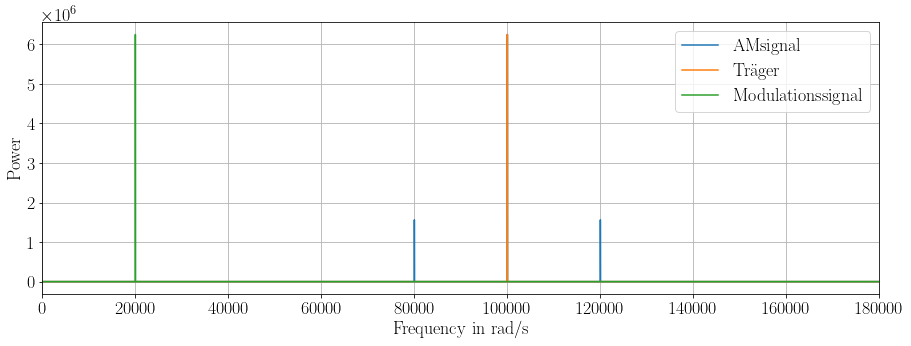

In [19]:
#General Settings
SAMPLE_RATE = 50*FREQUENCY_C
DURATION = 1/FREQUENCY_M*1000

#Generate Signals
time, voltage_c = generate_wave(FREQUENCY_C,SAMPLE_RATE,DURATION,amplitude=AMPLITUDE_C,form='cos')
time, voltage_m = generate_wave(FREQUENCY_M,SAMPLE_RATE,DURATION,amplitude=AMPLITUDE_M,form='cos')

#Show Modulation factor
display(Eq(m,AMPLITUDE_M/AMPLITUDE_C))

#Modulated Signal
_,voltage = generate_AM_wave(FREQUENCY_C, AMPLITUDE_C, FREQUENCY_M, AMPLITUDE_M, SAMPLE_RATE, DURATION)

plot_rfft_amp(time,AMsignal=voltage,Träger=voltage_c,Modulationssignal=voltage_m,xlim=[0,1.5*(FREQUENCY_C+FREQUENCY_M)],ytype='pow',yscale='linear')

### Modulationstrapez


In [20]:
#Carrier
FREQUENCY_C = 1*10**4
AMPLITUDE_C = 10

#Modulator
AMPLITUDE_M = 8
FREQUENCY_M_min = 2000
FREQUENCY_M_max = 3000

Untermodulation \$ m < 1 \$

m = 0.8

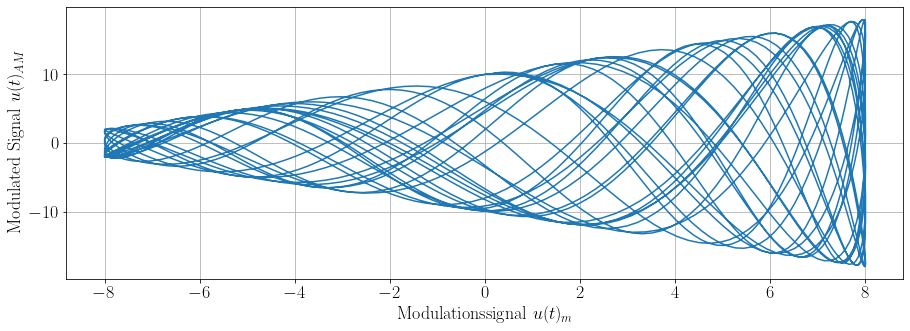

In [21]:
#General Settings
SAMPLE_RATE = 50*FREQUENCY_C
DURATION = 1/FREQUENCY_M_min*10**1

#Random modulator signal
time, voltage_m = generate_wavelet(FREQUENCY_M_min,FREQUENCY_M_max,AMPLITUDE_M,SAMPLE_RATE, DURATION)

#Modulated Signal
_,voltage = generate_AM_wave2(time,FREQUENCY_C,AMPLITUDE_C,voltage_m)

## under modulation
display(Eq(m,AMPLITUDE_M/AMPLITUDE_C))
plt_mod_trap(voltage_m,voltage)

Ideale Modulation \$ m = 1 \$

m = 1.0

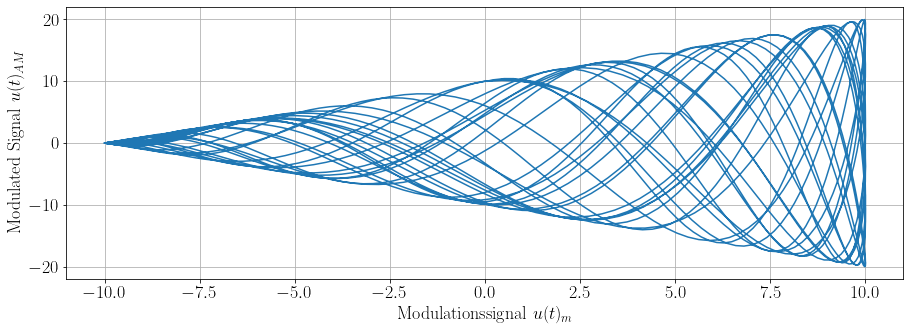

In [22]:
## perfect modulation
#Modulator
AMPLITUDE_M = 10

#Random modulator signal
time, voltage_m = generate_wavelet(FREQUENCY_M_min,FREQUENCY_M_max,AMPLITUDE_M,SAMPLE_RATE, DURATION)
#Modulated Signal
_,voltage = generate_AM_wave2(time,FREQUENCY_C,AMPLITUDE_C,voltage_m)
display(Eq(m,AMPLITUDE_M/AMPLITUDE_C))
plt_mod_trap(voltage_m,voltage)

Übermodulation \$ m >1 \$

m = 1.4

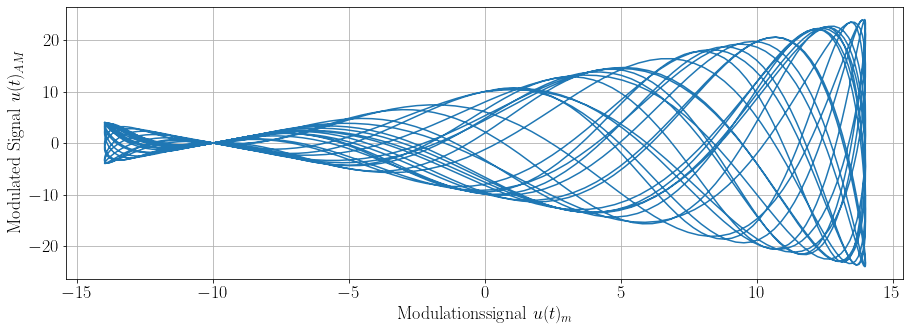

In [23]:
## over modulation
#Modulator
AMPLITUDE_M = 14
#Random modulator signal
time, voltage_m = generate_wavelet(FREQUENCY_M_min,FREQUENCY_M_max,AMPLITUDE_M,SAMPLE_RATE, DURATION)
#Modulated Signal
_,voltage = generate_AM_wave2(time,FREQUENCY_C,AMPLITUDE_C,voltage_m)
display(Eq(m,AMPLITUDE_M/AMPLITUDE_C))
plt_mod_trap(voltage_m,voltage)

## FM Modulation
Die Frequenzmodulation lässt sich mathematisch wie folgt anschreiben.


In [24]:
utFMeq1 = Eq(utFMt(t),Uc*cos(integrate(2*pi*ft(tau),(tau,0,t))))
display(utFMeq1)
utFMeq2 = Eq(utFMt(t),Uc*cos(integrate(2*pi*fc + 2*pi*deltaf*utmt(tau),(tau,0,t))))
display(utFMeq2)
utFMeq3 = Eq(utFMt(t),Uc*cos(2*pi*fc*t + integrate(2*pi*deltaf*utmt(tau),(tau,0,t))))
display(utFMeq3)

                       ⎛    t        ⎞
                       ⎜    ⌠        ⎟
u_FM(t) = \hat{U}_c⋅cos⎜2⋅π⋅⎮ f(τ) dτ⎟
                       ⎜    ⌡        ⎟
                       ⎝    0        ⎠

                       ⎛  ⎛  t            t                  ⎞⎞
                       ⎜  ⎜  ⌠            ⌠                  ⎟⎟
u_FM(t) = \hat{U}_c⋅cos⎜π⋅⎜2⋅⎮ f_c dτ + 2⋅⎮ \Delta f⋅uₘ(τ) dτ⎟⎟
                       ⎜  ⎜  ⌡            ⌡                  ⎟⎟
                       ⎝  ⎝  0            0                  ⎠⎠

                       ⎛             t                     ⎞
                       ⎜             ⌠                     ⎟
u_FM(t) = \hat{U}_c⋅cos⎜2⋅π⋅\Delta f⋅⎮ uₘ(τ) dτ + 2⋅π⋅f_c⋅t⎟
                       ⎜             ⌡                     ⎟
                       ⎝             0                     ⎠

Wird für das Modulationssignal eine Sinusschwingung eingesetzt vereinfacht sich die Gleichung.

In [25]:
eq2 = Eq(utmt(tau),cos(2*pi*fm*tau))
display(eq2)
eq1 = Eq(integrate(utmt(tau),(tau,0,t)),integrate(eq2.rhs,(tau,0,t)))
display(eq1)
utFMeq4 = Eq(utFMt(t),simplify(utFMeq3.rhs.subs(eq2.lhs,eq2.rhs)))
display(utFMeq4)

uₘ(τ) = cos(2⋅π⋅fₘ⋅τ)

t                         
⌠            sin(2⋅π⋅fₘ⋅t)
⎮ uₘ(τ) dτ = ─────────────
⌡                2⋅π⋅fₘ   
0                         

                       ⎛\Delta f⋅sin(2⋅π⋅fₘ⋅t)            ⎞
u_FM(t) = \hat{U}_c⋅cos⎜────────────────────── + 2⋅π⋅f_c⋅t⎟
                       ⎝          fₘ                      ⎠

Der Ausdruck \$\eta = \frac{\Delta f}{f_m}\$ wird dabei als Modulationsindex bezeichnet. Der Frequenzhub \$\Delta f\$ lässt sich aus der Amplitude des Modulationssignals \$\hat{U}_m\$  und der Empfindlichkeit \$K_f\$ zu \$\Delta f = K_f \cdot \hat{U}_m \$ berechnen. Der Frequenzhub \$\Delta f\$ ist proportional zur maximalen Modulationsspannung.
Aus den obigen Gleichungen ergibt sich auch, dass die Abweichung der momentanen Trägerfrequenz \$f(\tau)\$ proportional zur Modulationsspannung  ist.   
### Bandbreitenabschätzug
Mit der Carson-Formel kann die Bandbreite abgeschätzt werden. Wird die Bandbreite \$B_{10 \\%} \$ angebene, bezieht sich das \$10 \ \\% \$ auf den Anteil der berücksichtigen Spektrallinien. In diesem Fall werden \$90 \ \\%\$ berücksichtigt und \$10\ \\%$ nicht. Wird eine höhre Übertragungsgüte gewünscht, mehr Spektrallinien werden übertragen, so muss die Carson-Formel \$B_1\%\$ angewandt werden. Bei der Carson-Formel handelt es sich um eine Abschätzung. Für eine genauere Betrachtung muss die Bessel Funktion herangezogen werden.  
Eine FM moduliertes Signal hat unendlich viele Spektrallinien. Das bedeutet, dass die Bandbreite immer begrenzt werden muss. Daraus ergibt sich ein Amplitudenfehler.

In [26]:
B10eq1 = Eq(B10,2*(deltaf+fm))
display(B10eq1)
etaeq1 = Eq(eta,deltaf/fm)
display(etaeq1)
B10eq2 = Eq(B10,2*fm*(eta+1))
display(B10eq2)

B1eq1 = Eq(B1,2*(deltaf+2*fm))
display(B1eq1)
B1eq2 = Eq(B1,2*fm*(eta+2))
display(B1eq2)

B_{10\%} = 2⋅\Delta f + 2⋅fₘ

    \Delta f
η = ────────
       fₘ   

B_{10\%} = 2⋅fₘ⋅(η + 1)

B_{1\%} = 2⋅\Delta f + 4⋅fₘ

B_{1\%} = 2⋅fₘ⋅(η + 2)

### Beispiel UKW-Hörfunk
Als Beispiel für reale Daten kann der FM Hörfunk herangezogen werden. Der Frequenzhub beträgt \$\Delta f_T = \pm 75 \ \mathrm{kHz}\$ die Trägerfrequenz ist die Frequenz die am Radio angezeigt wird. Der Radiosender OE1 wird von der Sendeanlage Patscherkofel auf der Trägerfrequenz \$f_T = 82,5 \ \mathrm{MHz}\$ übertragen. {cite}`ORS1`  
Für die Darstellung der unten gelisteten Diagramme wurden andere Frequenzen gewählt um eine anschaliche Darstellung zu erhalten.

In [43]:
#Carrier
FREQUENCY_C = 10*10**4 #UKW: 100*10**6
AMPLITUDE_C = 1

#Modulator
FREQUENCY_M = 10*10**3 # 75 kHZ changed for explaination
AMPLITUDE_M = 1

#Frequenzhub Mono
DELTA_F=75*10**3

In [44]:
assign_meta_data(vals,fc,FREQUENCY_C)
assign_meta_data(vals,Uc,AMPLITUDE_C)
assign_meta_data(vals,fm,FREQUENCY_M)
assign_meta_data(vals,Um,AMPLITUDE_M)
assign_meta_data(vals,deltaf,DELTA_F)

assign_meta_data(vals,eta,etaeq1.rhs.subs(vals))
assign_meta_data(vals,B10,B10eq1.rhs.subs(vals))

show_numerical_value(vals,eta)
show_numerical_value(vals,B10)



η = 15/2

B_{10\%} = 170000

In [47]:
#General Settings
SAMPLE_RATE = 100*FREQUENCY_C
DURATION = 1/FREQUENCY_M*1000

#Generate Signals
time, voltage_c = generate_wave(FREQUENCY_C,SAMPLE_RATE,DURATION,amplitude=AMPLITUDE_C,form='cos')
time, voltage_m = generate_wave(FREQUENCY_M,SAMPLE_RATE,DURATION,amplitude=AMPLITUDE_M,form='cos')

#Generate FM Signal
utFMeq4_N = lambdify(t, utFMeq4.rhs.subs(vals))

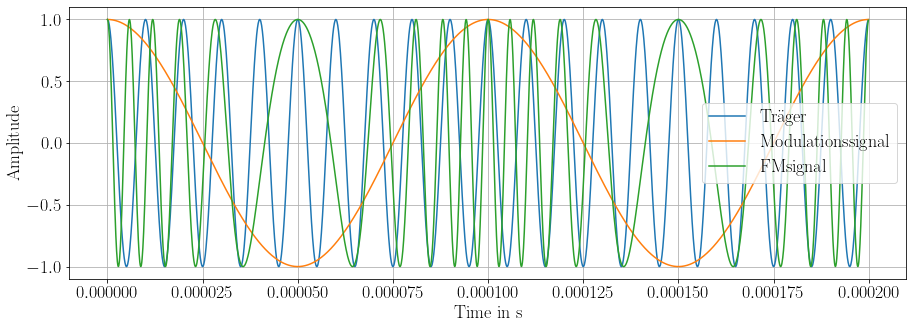

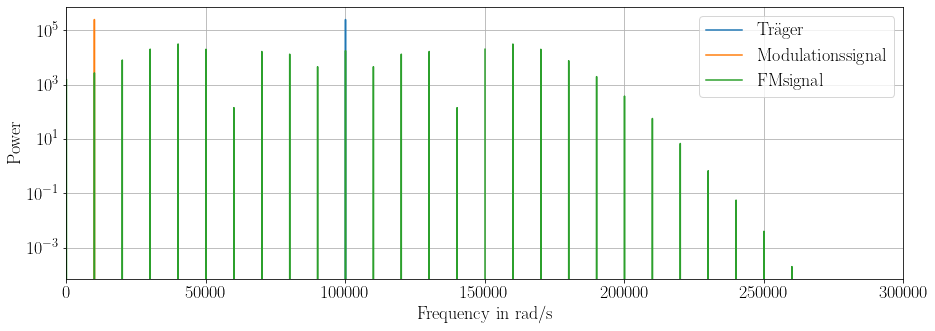

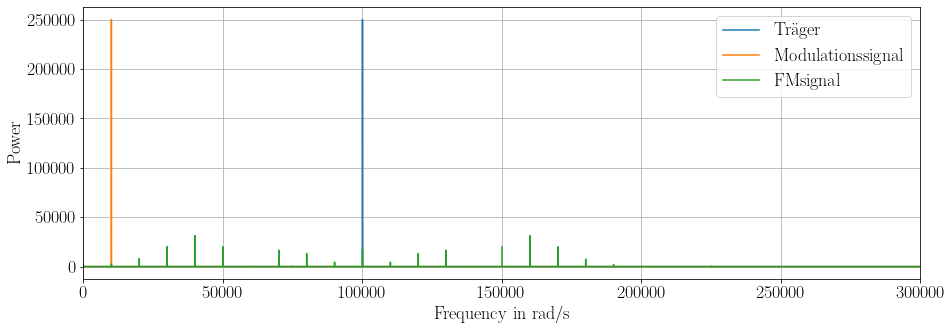

In [50]:
plot_vs_time(time,Träger=voltage_c,Modulationssignal=voltage_m,FMsignal=utFMeq4_N(time),show_time=2/FREQUENCY_M)
plot_rfft_amp(time,Träger=voltage_c,Modulationssignal=voltage_m,FMsignal=utFMeq4_N(time),xlim=[0*FREQUENCY_C,3*FREQUENCY_C],ytype='pow',yscale='log')
plot_rfft_amp(time,Träger=voltage_c,Modulationssignal=voltage_m,FMsignal=utFMeq4_N(time),xlim=[0*FREQUENCY_C,3*FREQUENCY_C],ytype='pow',yscale='linear')

## PM Modulation
Die Phasenmodulation lässt sich mathematisch wie folgt anschreiben.


In [31]:
utFMPMeq1 = Eq(utFMPMt(t),Uc*cos(integrate(2*pi*ft(tau),(tau,0,t))+phit(t)))
display(utFMPMeq1)

                            ⎛                 t        ⎞
                            ⎜                 ⌠        ⎟
u_{FM,PM}(t) = \hat{U}_c⋅cos⎜\varphi(t) + 2⋅π⋅⎮ f(τ) dτ⎟
                            ⎜                 ⌡        ⎟
                            ⎝                 0        ⎠

Da bei der Phasenmodulation die Frequenz nicht mit der Zeit verändert wird, ergibt sich für die Phasenmodulation folgende Gleichung.

In [32]:
uPMeq1 = Eq(utPM,Uc*cos(2*pi*fc*t+eta*cos(2*pi*fm*t)))
display(uPMeq1)

u_{PM}(t) = \hat{U}_c⋅cos(η⋅cos(2⋅π⋅fₘ⋅t) + 2⋅π⋅f_c⋅t)

Für ein Sinusförmiges Signal unterscheidet sich die PM nicht von der FM. Mit einem FM Modulator kann auch PM erzeugt werden, wenn man das Modulationssignal vor dem Modulator differenziert. Auch der umgekehrte Weg ist möglich. Wird das Modulationssignal vor dem Modulator integriert kann mit einem Phasenmodulator FM erzeugt werden.

## Digitale Modulation
Bei digitalen Modulationsverfahren treten nur diskrete Modulationswerte in euinem konstanten Zeotraster auf. Der Wechsel zwischen den diskreten Werten wird als Umtastung (shift keying) bezeichnet.  
Die Unterscheidung nach den umgetasteten Parametern des Trägersignals erfolgt identisch zur analogen Modulation. {ref}`arten-modulation`  
Wird die Amplitude umgetastet spricht man von ASK ... Amplitude shift keying.  
Wird die Frequenz umgetastet spricht man von FSK ... Frequency shift keying.  
Wird die Phase umgetastet spricht man von PSK ... Phase shift keying.

### Takt
Für die steuerung der internen Vorgänge wird ein internes Taktsignal verwendet. Während einer Taktperiode wird genau ein Bit übertragen.  
Die Frequenz des Taktsignales wird Bittaktfrequenz genannt.

In [57]:
fbitEq1 = Eq(fbit,1/Tbit)
display(fbitEq1)

             1   
f_{Bit} = ───────
          T_{Bit}

Im Empfänger muss das Taktsignal aus dem digitalen Modulationssignal zurückgewonnen werden. Dies wird als Taktrückgewinnung bzw. auf Englisch clock recovery.

### Grafische Darstellung
```{figure} ./images/digitale_modulation1.png
:name: Digitale Modulation
:width: 400px

Binäres rechteckförmiges Quellensignal (a) sowie die resultierenden Sendesignale bei ASK (b), FSK (c) und PSK (d). {cite}`DMV1`  
```

### Bandbreiteneffizienz
Die Bandbreiteneffizienz gibt die pro Hz Bandbreite übertragene Bitrate an.  
\$ Bandbreiteneffizienz = \frac{Biterate}{Bandbreite} \$  
\$ [Bandbreiteneffizienz] = \frac{\frac{Bit}{s}}{Hz}\$  
Die höchste Bandbreiteffizienz wird mit der PSK erreicht. Die einfachste Form der PSK ist die binäre PSK, BPSK oder auch 2PSK. Dabei wird zwischen Phasenzusänden umgetastet.  
\$ Bandbreiteneffizienz_{2PSK} = 1 \ \frac{\frac{Bit}{s}}{Hz}\$
Durch erhöhung der Anzahl der Phasenzustände können mehrere Bit pro Takt übertragen werden.  

```{figure} ./images/2PSK.png
:name: Digitale Modulation
:width: 400px

2PSK \$ Bandbreiteneffizienz_{2PSK} = 1 \ \frac{\frac{Bit}{s}}{Hz}\$
```


```{figure} ./images/4PSK.png
:name: Digitale Modulation
:width: 400px

4PSK \$ Bandbreiteneffizienz_{4PSK} = 2 \ \frac{\frac{Bit}{s}}{Hz}\$
```


```{figure} ./images/8PSK.png
:name: Digitale Modulation
:width: 400px

8PSK \$ Bandbreiteneffizienz_{8PSK} = 3 \ \frac{\frac{Bit}{s}}{Hz}\$
```

### Bandbreite
Das Umtastsignal, bei der analogtechnik das Modulationssignal genannt, ist ein Rechtecksignal und hat damit eine sehr große Bandbreite. Siehe Fourierzerlegung eines Rechtecksignales.  
Daraus resultiert eine sehr große Bandbreite des modulierten Signals. Um die benötigte Bandbreite zu reduzieren wird die Bandbreite des Umtastsignals reduziert. 